<a href="https://colab.research.google.com/github/MatheusOrange211/Bootcamp-Alura/blob/main/Bootcamp_Alura_Data_Science_Hospitalar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando os dados do Datasus Segunda Parte

---



## **Importando os dados**
### Precisamos primeiramente fazer o upload do arquivo que utilizaremos. Na opção arquivos do Colab, importamos o arquivo com que trabalharemos. 


> Importando o ***Pandas***
> e o **matplotlib**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



>Atrelamos nosso arquivo **CSV** a variável dados. Para isso utilizaremos o *pd.read_csv* para realizar a leitura. Temos então:


*   Caminho onde está o arquivo

*   **enconding = 'ISO-8859-1'** (Padrão que utilizaremos para ler arquivos como caracteres latinos e de compatibilidade com o **UTF-8**

*   **skiprows** (ignora as  ***x*** primeiras linhas do arquivo)
*   **skipfooter** (Ignora as ***y*** últimas linhas do arquivo)


*   **sep** (separador de linhas e colunas do nosso arquivo. em **csv** geralmente é a *vírgula* ou *ponto-virgula*
*   Item da lista


*   **thousands = ' . '** (habilitará a transformação dos valores para o formato americano, já que o brasileiro é diferente, o que evita erros futuros)
*   **decimal = ' , ' ** (habilita que os decimais serão separados por vírgulas)



*   **na_values** é de suma importância pois pega valores vazios e transforma para **NaN**










In [2]:
dados = pd.read_csv('/content/A160324189_28_143_208.csv',encoding='ISO-8859-1',skiprows=3,sep=";",skipfooter=12,
                    thousands=".",decimal=",", na_values='-',engine ='python')
dados

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.041249e+06,8.199033e+06,8.363386e+06,7.889820e+06,8.603944e+06,8.048398e+06,8.159737e+06,8.457456e+06,7.766983e+06,8.858846e+06,8.407076e+06,9.492939e+06,8.206196e+06,9.011613e+06,9.124968e+06,8.406733e+06,8.411360e+06,8.651082e+06,8.193426e+06,8.388269e+06,8.645316e+06,9.050329e+06,9.211263e+06,9.490545e+06,8.600886e+06,8.919191e+06,8.909112e+06,8.409386e+06,8.924348e+06,8.948606e+06,8.660753e+06,8.326416e+06,8.413784e+06,7.174312e+06,7.423679e+06,8.581195e+06,9.193594e+06,7.407388e+06,3.556382e+06,9.291297e+08
1,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.355223e+06,3.562692e+06,3.375297e+06,3.341498e+06,3.358378e+06,3.145385e+06,2.638774e+06,2.968169e+06,2.769797e+06,3.057632e+06,2.874965e+06,3.175575e+06,3.060903e+06,3.253012e+06,3.040645e+06,2.926179e+06,3.126121e+06,2.473455e+06,2.277493e+06,2.594347e+06,2.234388e+06,2.473008e+06,2.979765e+06,3.070534e+06,3.249053e+06,3.567539e+06,2.981073e+06,2.998860e+06,3.293379e+06,3.174249e+06,2.959569e+06,3.261124e+06,2.981264e+06,2.859102e+06,2.472063e+06,2.383895e+06,2.199921e+06,1.163813e+06,NaN,4.206680e+08
2,13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.371883e+07,1.439621e+07,1.374530e+07,1.397979e+07,1.389552e+07,1.351812e+07,1.363519e+07,1.454945e+07,1.275356e+07,1.474941e+07,1.457793e+07,1.538106e+07,1.465365e+07,1.554460e+07,1.637496e+07,1.534334e+07,1.624996e+07,1.425541e+07,1.427405e+07,1.535891e+07,1.410007e+07,1.610397e+07,1.615449e+07,1.652998e+07,1.550998e+07,1.664222e+07,1.649372e+07,1.534632e+07,1.628244e+07,1.478133e+07,1.492338e+07,1.593956e+07,1.513811e+07,1.477374e+07,1.633091e+07,1.944115e+07,1.750933e+07,1.335851e+07,4.726486e+06,1.771655e+09
3,14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.699214e+06,2.682746e+06,2.891100e+06,2.737678e+06,2.693726e+06,2.671452e+06,2.688316e+06,2.740952e+06,2.478349e+06,2.674959e+06,2.721261e+06,2.844812e+06,2.967161e+06,2.841588e+06,3.328231e+06,2.878691e+06,2.964324e+06,2.524712e+06,2.462452e+06,2.662240e+06,2.499996e+06,2.846136e+06,2.789823e+06,2.839390e+06,2.647540e+06,2.865778e+06,3.181322e+06,3.070437e+06,3.162342e+06,3.121105e+06,2.889970e+06,3.084561e+06,2.967159e+06,2.813954e+06,2.304961e+06,2.910776e+06,3.216467e+06,2.739498e+06,1.524478e+06,3.050109e+08
4,15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.180860e+07,3.213313e+07,3.377056e+07,3.297993e+07,3.366504e+07,3.347555e+07,3.206793e+07,3.361584e+07,3.062349e+07,3.412193e+07,3.503995e+07,3.542461e+07,3.416028e+07,3.448495e+07,3.561836e+07,3.438092e+07,3.844109e+07,3.358354e+07,3.278935e+07,3.451353e+07,3.188592e+07,3.323616e+07,3.100892e+07,3.106411e+07,2.854318e+07,3.671393e



> .head mostra as 5 primeiras linhas



In [3]:
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,NaN,4.206680e+08
2,13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


.tail mostra as 5 ultimas linhas

In [4]:
dados.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,1.030282e+08,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38,1.195865e+10
23,50 Mato Grosso do Sul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16323017.60,16892566.36,17019787.73,15808304.19,16071645.95,15687000.65,15040368.93,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964757.79,17259392.23,18147562.63,19143242.28,17905638.97,1.812695e+07,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35,4059220.22,2.172158e+09
24,51 Mato Grosso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,1.646780e+07,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,6174224.99,2.036924e+09
25,52 Goiás,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33663853.68,33958341.89,36899367.18,32721458.05,35621496.15,32535396.77,32332573.53,33702293.07,30923462.58,34861711.53,33764503.14,36357757.30,33492211.73,35313884.40,35380148.68,33780632.05,35990491.96,34862475.74,34050646.02,34795831.02,33279088.23,34951022.38,36207403.69,37750841.56,35372150.57,3.647362e+07,38399592.70,36335534.96,37171427.64,36234132.35,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38,20242641.73,4.657349e+09
26,53 Distrito Federal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,2.151493e+07,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479



> Mostremos a **media** rapidamente. Contudo, note que o formato está em amostragem cientifica, o que é complicado de se entender...



In [5]:
dados.mean()

1992/Mar    4.024316e+04
1992/Abr    1.144999e+04
1993/Mai    3.458377e+04
1993/Dez    6.855652e+04
1994/Jan    3.980934e+04
                ...     
2020/Mai    4.676903e+07
2020/Jun    4.536735e+07
2020/Jul    4.071708e+07
2020/Ago    1.988085e+07
Total       5.993724e+09
Length: 279, dtype: float64



> Façamos então, a formatação de nosso pandas para mostrar os valores com dois valores após o ponto, como estamos mais acostumados a entender. Agora, printando a media, podemos entender melhor o que temos 




In [6]:
pd.options.display.float_format = "{:.2f}".format
dados.mean()

1992/Mar        40243.16
1992/Abr        11449.99
1993/Mai        34583.77
1993/Dez        68556.52
1994/Jan        39809.34
                ...     
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
2020/Ago     19880851.12
Total      5993724452.01
Length: 279, dtype: float64



> Pegando dados de uma coluna específica



In [7]:
dados['2008/Ago']

0      2938286.29
1      1886871.84
2      8331763.97
3      1045291.11
4     23259148.28
5      1550340.63
6      5213290.38
7     14609872.57
8     10645917.52
9     29304821.51
10    10812840.19
11    12673774.35
12    31705296.79
13     9262767.68
14     4543252.50
15    43254543.33
16    80374117.08
17    12384068.19
18    42487939.51
19   179898070.22
20    56699001.13
21    28887854.62
22    56233758.74
23     9602843.49
24     8987811.95
25    21041071.33
26    11548451.89
Name: 2008/Ago, dtype: float64

In [8]:
dados['2008/Ago'].mean()

26636409.892222222



> Plotando um gráfico com o Pandas



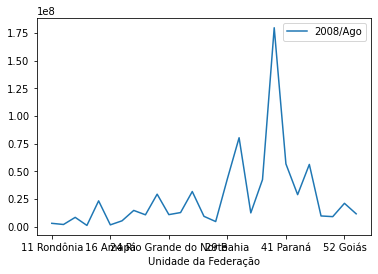

In [9]:
dados.plot(x='Unidade da Federação',y='2008/Ago')

**Observação:**


> Convenhamos que este gráfico não está nem legível, muito menos explícito quanto as informações. A melhor maneira de expressar essas informações é por meio de um gráfico de barras, ou  **kind="bar"**



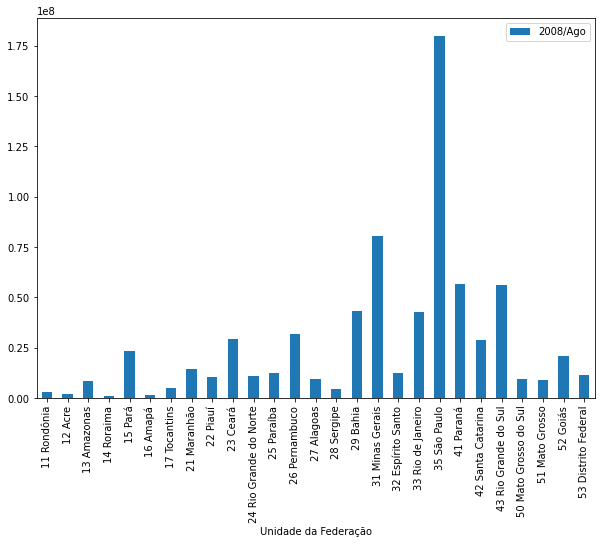

In [10]:
dados.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(10,7))

## Vamos usar o Matplotlib a partir de agora.
> O motivo é simples. Ele é mais completo e permite mais configurações.

> Vamos também realizar algumas modificações, como:
 - Adicionar um título ao gráfico
 - Mexer nos valores do eixo y para mostrar valores com casas decimais e não no formato cientifico (usando o **ticker**)

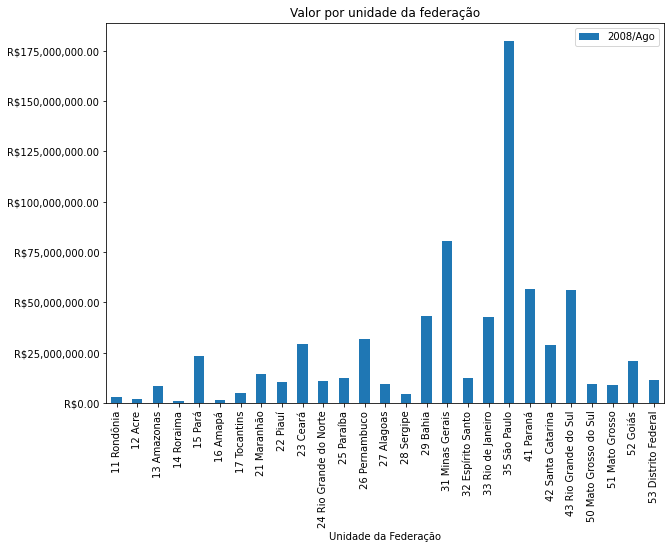

In [11]:
from matplotlib import ticker

#ax = axis = eixos (onde faremos modfificações agora)
ax = dados.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(10,7))
#estamos modificando nosso eixo-y com o metodo set_major_formatter
#dentro dele, passamos o ticker.StrMethodFormatter com o formato como queremos que as informações sejam mostradas
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
plt.title('Valor por unidade da federação')
plt.show()

##DESAFIO AULA 1 - 01 
> Escolher um nome melhor para o título. Que passe uma ideia melhor do que nós queremos

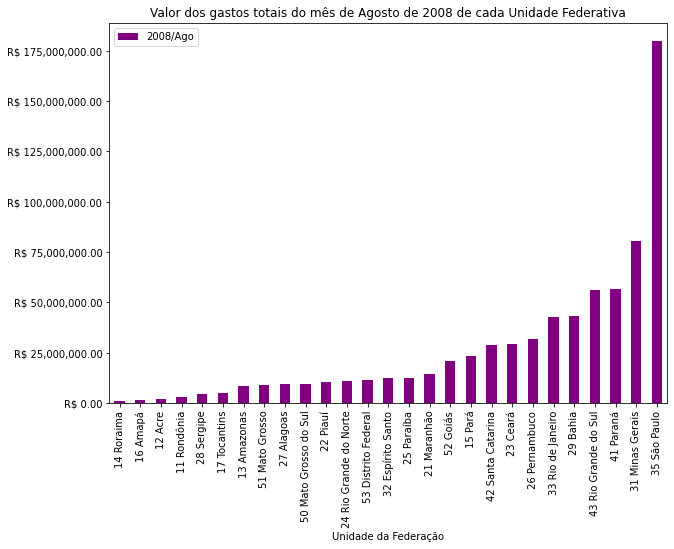

In [12]:
dado = dados.sort_values("2008/Ago",ascending=True)
ax = dado.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(10,7),color='purple')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Valor dos gastos totais do mês de Agosto de 2008 de cada Unidade Federativa")
plt.show()


## DESAFIO AULA 1 - 02
mostrar o gráfico com os valores mais recentes da tabela

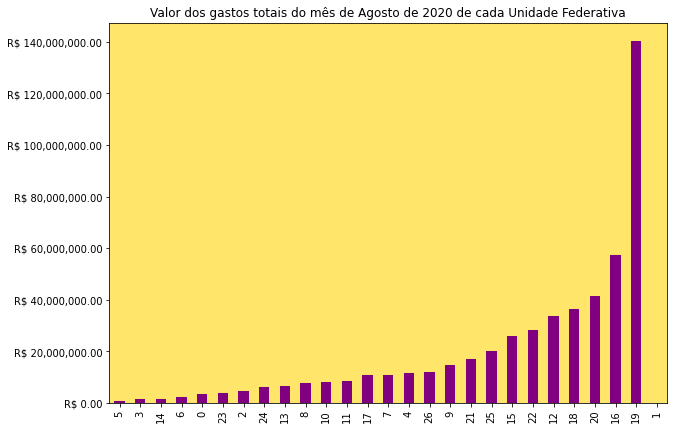

In [13]:
dados_crescente = dados['2020/Ago']
dados_crescente = dados_crescente.sort_values(ascending=True)

ax1 = dados_crescente.plot(x="Unidade da Federação",y='2020/Ago',kind="bar",figsize=(10,7),color='purple')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Valor dos gastos totais do mês de Agosto de 2020 de cada Unidade Federativa")
ax1.set_facecolor((1.0, 0.9, 0.42))
plt.show()


# Seção de Curiosidade
### Nesta parte, eu vasculho um pouco das possibilidades do que posso já fazer

In [14]:
dados_crescente = dados['Unidade da Federação']
uf_organizado = dados_crescente
uf_organizado = uf_organizado.str.replace(r'[0-9]','')
uf_org = uf_organizado

dados_crescente2 = dados['2020/Ago']
dados_crescente2.sort_index()
a = uf_org.sort_index()

In [15]:
dados_crescente2

0      3556381.57
1             nan
2      4726485.73
3      1524478.04
4     11559714.54
5       834187.31
6      2453362.74
7     10916718.78
8      7926321.69
9     14559529.59
10     8080160.97
11     8585226.08
12    33544876.14
13     6487947.82
14     1742127.72
15    26023558.53
16    57473699.06
17    10824255.26
18    36264322.65
19   140414944.95
20    41542401.16
21    16991236.43
22    28349257.38
23     4059220.22
24     6174224.99
25    20242641.73
26    12044848.02
Name: 2020/Ago, dtype: float64

In [16]:
uf_organizado

0                 Rondônia
1                     Acre
2                 Amazonas
3                  Roraima
4                     Pará
5                    Amapá
6                Tocantins
7                 Maranhão
8                    Piauí
9                    Ceará
10     Rio Grande do Norte
11                 Paraíba
12              Pernambuco
13                 Alagoas
14                 Sergipe
15                   Bahia
16            Minas Gerais
17          Espírito Santo
18          Rio de Janeiro
19               São Paulo
20                  Paraná
21          Santa Catarina
22       Rio Grande do Sul
23      Mato Grosso do Sul
24             Mato Grosso
25                   Goiás
26        Distrito Federal
Name: Unidade da Federação, dtype: object

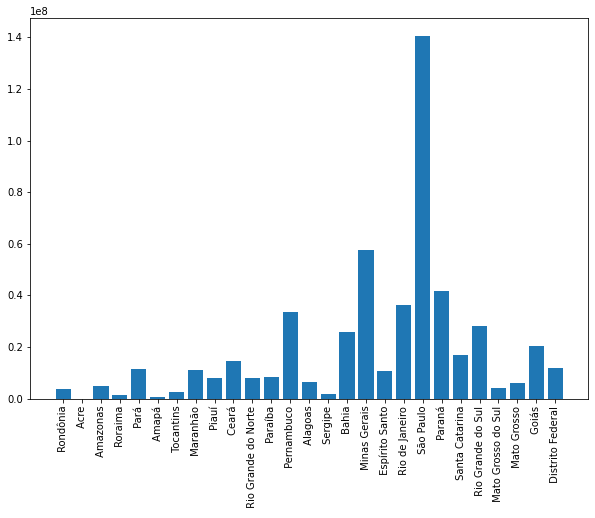

In [17]:
plt.figure(figsize=(10,7))

plt.bar(uf_organizado,dados_crescente2)
plt.xticks(rotation=90)
plt.show()

# AULA 02
---


# **Observação**
##Estou puxando o dataset novamente abaixo para evitar erros como o que já for feito acima. Apesar de que acima, é o mesmo arquivo, preferi não gerar erros com o que está na aula, como forma de manter o mais parecido possível.

In [18]:
dados_sus = pd.read_csv('/content/A160324189_28_143_208.csv',encoding='ISO-8859-1',skiprows=3,sep=";",skipfooter=12,
                    thousands=".",decimal=",",engine ='python')



> Como mostrar duas colunas no python???



In [19]:
#'dados' precisa que passemos a lista com as colunas que queremos, por isso o colchete duplo, senao, o python vai 
#tentar procurar uma coluna com o nome das duas informações que passamos e obviamente, ele não encontrará :/
dados_sus[['2008/Ago','2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


#**Pergunta:**
como fazer uma comparação entre os estados, descartando os anos em que algum deles estava sem valores???


In [20]:
dados_sus.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

>Observe que o mean ignorou dados anteriores a 2007, pois haviam campos em branco. Como não usei o *na_values = '-'*, os campos não ficaram com 'nan', assim não houve modificações no arquivo, mantendo concordância com o da aula.Porém, vale ressaltar que esta estratégia não se aplica em todos os casos

>Pegando os valores da coluna da esquerda, temos

In [21]:
colunas_usaveis = dados_sus.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação") #Também fiz a inserção da coluna unidade da federação na posição 0
                                                 # Logo, a coluna inteira de todos os estados aparecerá no inicio
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


>Pediremos então que nosso dataset mostre apenas essas colunas(as que estão com todos os estados preenchidos nos meses), fazendo então o **slicing** de dados

In [22]:
usaveis = dados_sus[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

#Transformando coluna 'Unidades da Federação' em indice do nosso dataset


> Tomar cuidado quanto a essa parte para não comprometer todo o dataset. Por isso criei a variavel *usaveis*

In [23]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [24]:
usaveis["2019/Jan"].head() #Olha como fica agora a questão do indice e a coluna de "2019/Jan"

Unidade da Federação
11 Rondônia    8388269.45
12 Acre        2594347.32
13 Amazonas   15358914.00
14 Roraima     2662240.18
15 Pará       34513534.80
Name: 2019/Jan, dtype: float64

##Encontrando linhas com .Loc[argumento]
Localiza a linha cujo o indice eu passo dentro dos parenteses

In [25]:
usaveis.loc["12 Acre"] #imprimo a linha cujo o indice é "12 Acre". Obviamente ele mostra como coluna

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Abr     2472063.08
2020/Mai     2383895.48
2020/Jun     2199920.70
2020/Jul     1163813.08
Total      420668039.63
Name: 12 Acre, Length: 157, dtype: float64

>Plotando o gráfico dessa tabela, percebemos um problema quanto a **legenda**  e **posicionamento** dos eixos. O pandas acaba mostrando todos os meses de todos os anos. Isso não é o melhor a se fazer, certo?

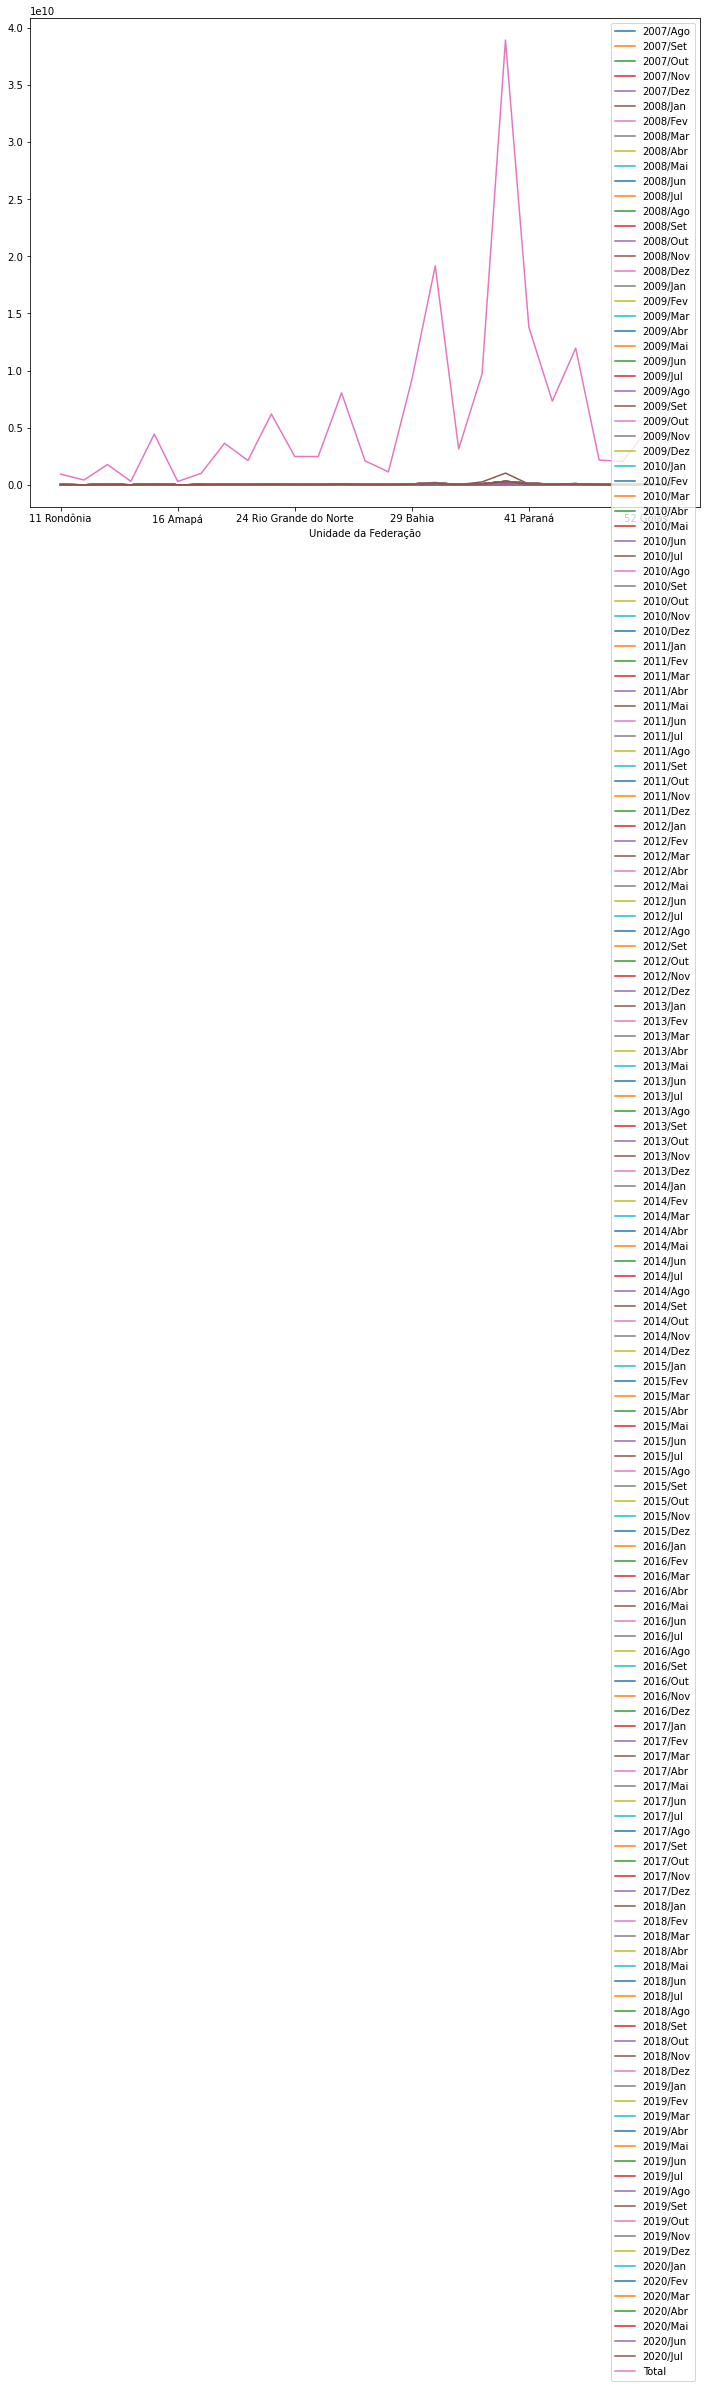

In [26]:
usaveis.plot(figsize=(12,9))

##Transpor Tabela/Matriz

In [27]:
usaveis.T.head() #o T faz toda a trabalheira de transpor nossa tabela. O que é linha vira coluna e vice-versa

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,134605.36,97352.78,400640.85,104243.75,27453.63,135146.36,971394.37,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,272088.08,368130.43,1088340.42,174024.90,78565.19,448349.75,2861781.50,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,684678.30,1002088.64,2973553.48,595544.54,122952.94,1382038.11,10018011.35,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,1695824.89,2149873.40,6699828.82,1125396.73,775705.52,3348779.62,21730281.63,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,4730811.68,5448177.36,16919031.39,2564966.65,2765495.63,11948984.56,43429517.54,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


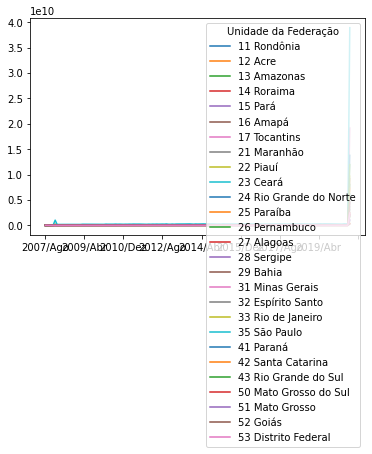

In [28]:
usaveis.T.plot()

>Mas calma ai ! Notamos umas coisas estranhas ainda, certo? Note que no final do grafico, a linha cresce abruptamente. Isso ocorreu porque, como transformei as linhas em colunas, e as colunas em linhas, a antiga coluna **total** virou linha e ai somou tudo. Vamos então remover ele

In [29]:
usaveis = usaveis.drop("Total",axis=1) #remover ele do eixo das linhas (linha = 1 / coluna = 0)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8133488.55,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2811365.43,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13717831.75,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2392160.30,2761536.23,26992

> Agora, podemos novamente transpor as linhas e colunas, já que não salvei essa ação em nenhuma variável. Vamos ver como ficou

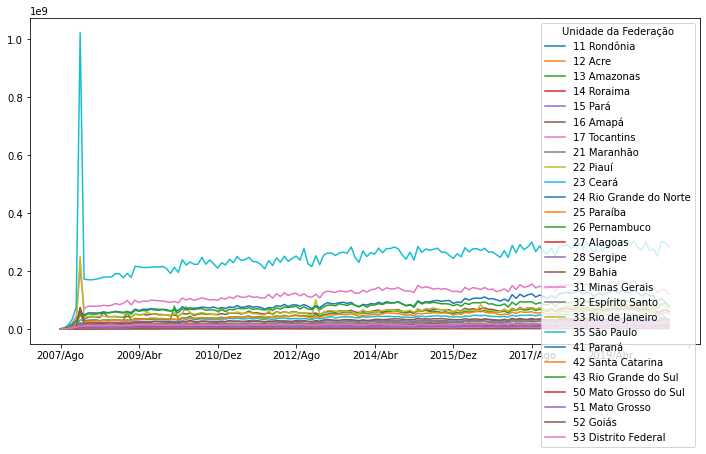

In [30]:
usaveis.T.plot(figsize=(12,6))

## DESAFIO AULA 2 - 01
> Reposicionar melhor a legenda do gráfico

[Como mudar a posição das legendas](https://pythonspot.com/matplotlib-legend/)

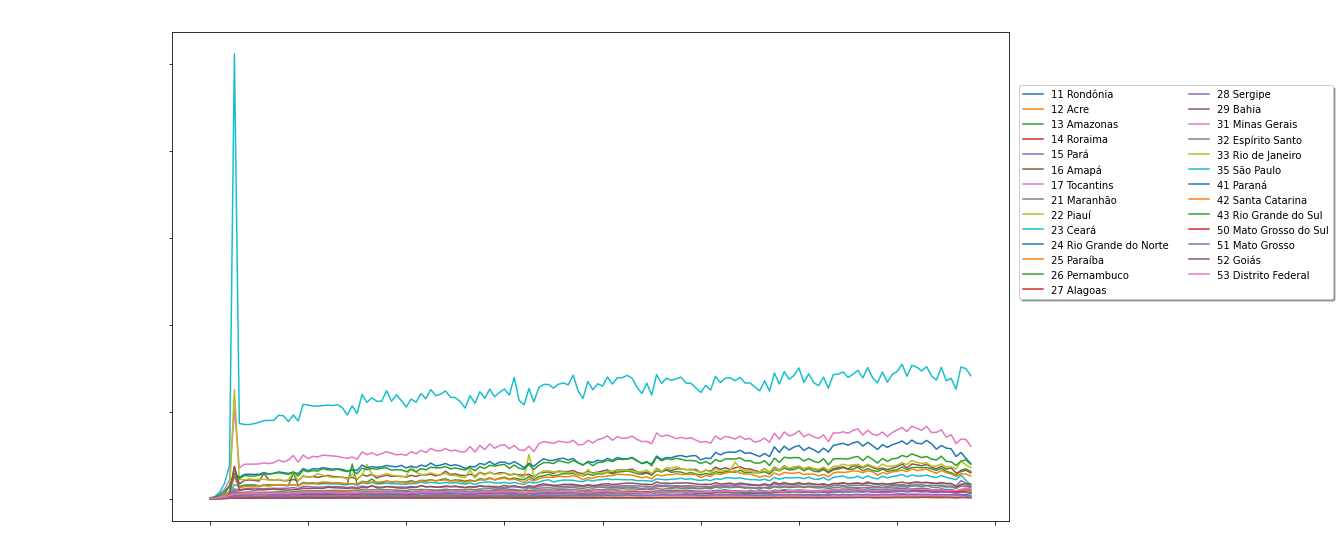

In [31]:
usaveis_grafico = usaveis.T.plot(figsize = (15,9))
usaveis_grafico.legend(loc='upper center',bbox_to_anchor=(1.2, 0.9),shadow=True,ncol=2) #como adicionar legenda fora

usaveis_grafico.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

plt.yticks(color='w',fontsize=15)
plt.xticks(color='w',fontsize=15)
plt.title("Valores mensais de cada Estado dos anos de 2007-2020",fontsize= 25,color='w')
plt.show()

##DESAFIO AULA 2 - 02
> Plotar o gráfico de linha com apenas 5 estados de sua preferência

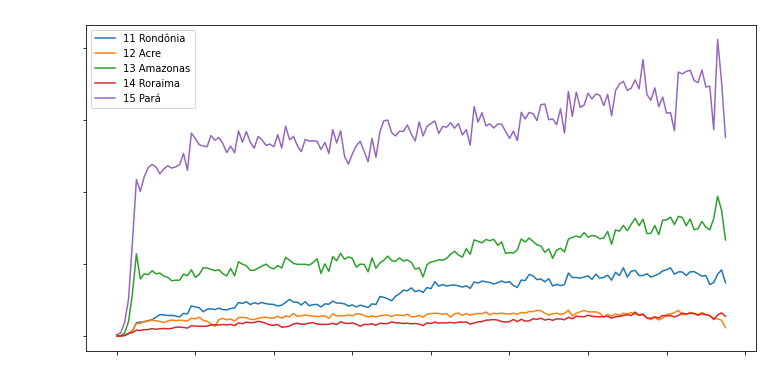

In [32]:
grafico_preferencia = usaveis.head().T.plot(figsize=(12,6))
grafico_preferencia.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend()
plt.yticks(color='w',fontsize=10)
plt.xticks(color='w',fontsize=10)
plt.title("5 Estados de Preferência",fontsize= 15,color='w')
plt.show()


#Curiosidade

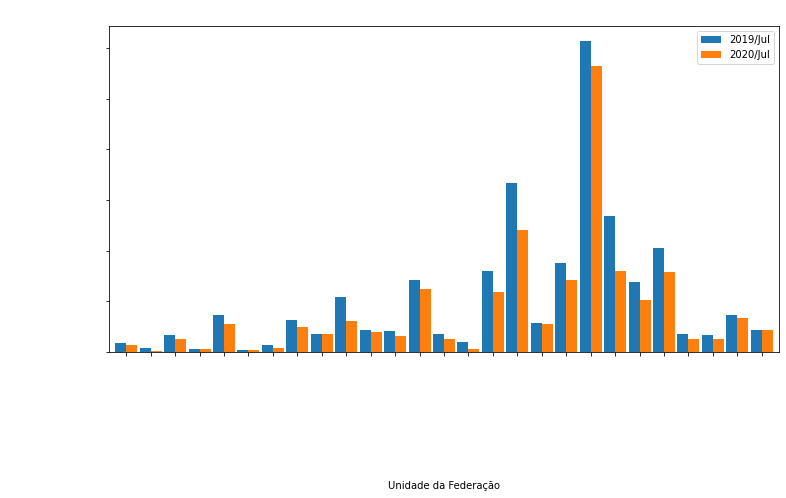

In [33]:
comparativo_2019_2020 = usaveis[['2019/Jul','2020/Jul']].plot(figsize=(12,6),kind="bar",width=0.9)
comparativo_2019_2020.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.yticks(color='w',fontsize=10)
plt.xticks(color='w',fontsize=10)
plt.title("Comparativo do mês de Julho 2019 e 2020",fontsize= 15,color='w')
plt.show()

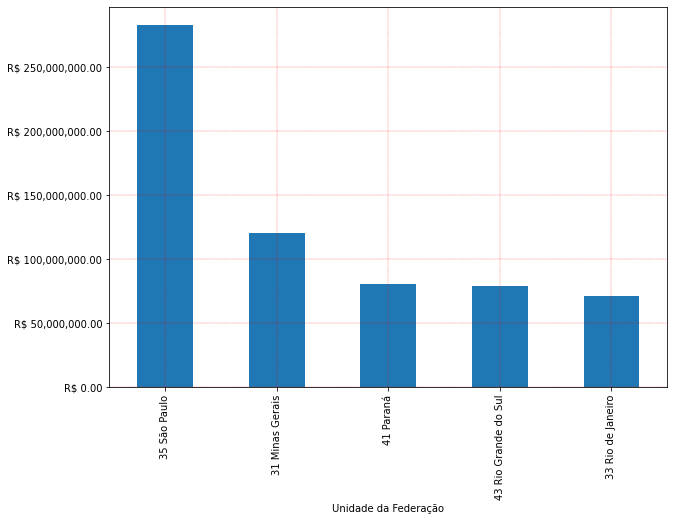

In [34]:

maiores_gastos = usaveis["2020/Jul"]
maiores_gastos = maiores_gastos.sort_values(ascending=False)
maiores_gastos = maiores_gastos.head()
maiores_gastos


maiores_gastos_estados = maiores_gastos.plot(kind="bar",figsize=(10,7))

plt.grid(linewidth=0.4, color='red', linestyle='dashed',alpha=0.7) #Add linhas de grade
maiores_gastos_estados.set_facecolor((1, 1, 1))

maiores_gastos_estados.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

plt.show()

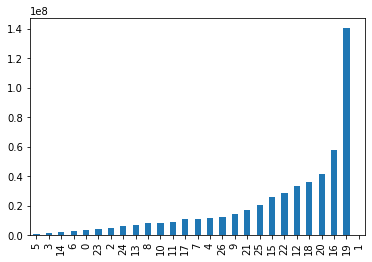

In [35]:
x = dados["2020/Ago"]
x.dropna(axis=0,how=all) #removi o NaN da minha series, tanto é que ele removeu a linha de indice 1


maiores_gastos_sus = x
maiores_gastos_sus = maiores_gastos_sus.sort_values(ascending=True)
maiores_gastos_sus.plot(kind="bar")

In [36]:
maiores_gastos_sus.sort_values(ascending=False)

19   140414944.95
16    57473699.06
20    41542401.16
18    36264322.65
12    33544876.14
22    28349257.38
15    26023558.53
25    20242641.73
21    16991236.43
9     14559529.59
26    12044848.02
4     11559714.54
7     10916718.78
17    10824255.26
11     8585226.08
10     8080160.97
8      7926321.69
13     6487947.82
24     6174224.99
2      4726485.73
23     4059220.22
0      3556381.57
6      2453362.74
14     1742127.72
3      1524478.04
5       834187.31
1             nan
Name: 2020/Ago, dtype: float64

#AULA 03
---

##Como mostrar os 5 primeiros estados do nosso dataset?

> Aplicamos a técnica do *Slicing*.
>Afinal, estamos mexendo justamente com estruturas que nos lembram listas

In [37]:
#mostrar do elemento 0 até o 6° (exclui o 7°)
#Mas observe que estamos transpondo nosso dataframe
usaveis.T.columns[:7]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins'],
      dtype='object', name='Unidade da Federação')

In [38]:
#poderiamos tambem, a partir do nosso index(lembrando que o index agora é "Unidades da federação")
usaveis.index[:7]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins'],
      dtype='object', name='Unidade da Federação')

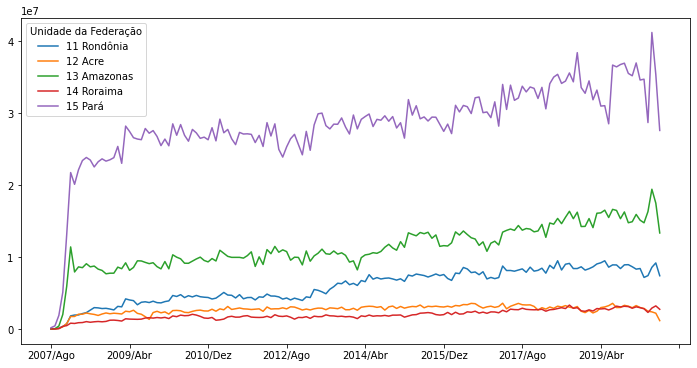

In [39]:
# O plot dos 5 primeiros da nossa tabela seria assim
usaveis[:5].T.plot(figsize=(12,6))
plt.show()



## .sample()
>A partir dele, passando um valor para **n**, retorna-se **n** valores aleatórios do nosso dataframe



In [40]:
usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,11969271.76,11299443.00,11548451.89,12422577.60,12419976.84,12302698.99,12005669.60,13150489.00,12358825.51,14445518.57,14434211.04,14622167.93,14209413.80,14459081.79,15051993.46,14045711.83,13162775.24,13197596.70,12889509.22,13484046.67,13295738.66,14928384.44,13535496.11,14394599.86,13863063.00,14051586.56,15073336.93,14636724.40,14052063.36,14277016.84,...,16523664.46,15531998.60,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,1420892.01,1367235.47,1550340.63,1550166.99,1635676.50,1647903.31,1649380.76,1702307.43,1617603.91,1863376.50,1899215.36,1929012.06,1776155.94,1765731.76,2038762.73,1820033.62,1806092.38,1669318.82,1551083.36,1713037.45,1448489.25,1850181.41,1860225.48,1739371.09,1826492.45,1827433.46,1933782.60,1721224.14,1679410.24,1672233.87,...,1813477.93,2125677.11,2128578.23,1873120.82,1990850.21,1920807.56,1915176.64,1782927.17,1610779.22,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2356798.88,2441325.03,2564176.12,2604263.92,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13717831.75,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,65111965.49,61590828.91,64402291.62,63090640.55,69137004.88,66062629.79,65222011.32,67569409.19,64189115.30,62244282.80,65488387.8

>Mas se nós quisermos valores aleatórios, contudo, queiramos manter estes valores toda vez que executar?

In [41]:
#vamos então setar que nosso valor aleatório parta deste numero
np.random.seed(687942)
usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,24900816.95,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10207998.29,10721328.37,12298227.11,11640067.28,12397524.20,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,15162136.63,13649319.45,14242023.19,12551831.85,13470311.65,14156977.75,13940868.00,13272057.48,13473107.56,...,18225302.41,20227425.64,18861445.44,18766514.59,20028976.78,18531262.60,18122577.13,18169461.87,18118258.43,19045469.42,18254034.58,20972187.31,20717428.90,21991859.64,20909808.17,21544864.14,22616858.75,19926336.21,22290820.67,20445273.59,19380375.16,21147377.76,20770925.83,21775213.78,22206576.63,23819430.58,21613567.61,22137087.77,23073307.72,23437265.73,23085765.53,20350167.95,20135895.21,22201116.15,20512979.08,20936692.02,17319947.66,19916570.52,20219961.81,19593057.45
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,5614918.90

>**Observação**: isso mudará caso eu coloque o seed em apenas uma celula. Cada celula vai variar

##Testes

In [42]:
dados["Unidade da Federação"]

0                11 Rondônia
1                    12 Acre
2                13 Amazonas
3                 14 Roraima
4                    15 Pará
5                   16 Amapá
6               17 Tocantins
7                21 Maranhão
8                   22 Piauí
9                   23 Ceará
10    24 Rio Grande do Norte
11                25 Paraíba
12             26 Pernambuco
13                27 Alagoas
14                28 Sergipe
15                  29 Bahia
16           31 Minas Gerais
17         32 Espírito Santo
18         33 Rio de Janeiro
19              35 São Paulo
20                 41 Paraná
21         42 Santa Catarina
22      43 Rio Grande do Sul
23     50 Mato Grosso do Sul
24            51 Mato Grosso
25                  52 Goiás
26       53 Distrito Federal
Name: Unidade da Federação, dtype: object

In [43]:
lista_estados = dados["Unidade da Federação"]

tamanho = len(lista_estados)
#lista_estados.str.startswith("2")

norte = list(filter(lambda x: x.startswith("1"), lista_estados))
nordeste = list(filter(lambda x: x.startswith("2"),lista_estados))
sudeste = list(filter(lambda x: x.startswith("3"),lista_estados))
sul = list(filter(lambda x: x.startswith("4"),lista_estados))
centro_oeste = list(filter(lambda x: x.startswith("5"),lista_estados))

In [44]:
norte, nordeste, sudeste, sul, centro_oeste

(['11 Rondônia',
  '12 Acre',
  '13 Amazonas',
  '14 Roraima',
  '15 Pará',
  '16 Amapá',
  '17 Tocantins'],
 ['21 Maranhão',
  '22 Piauí',
  '23 Ceará',
  '24 Rio Grande do Norte',
  '25 Paraíba',
  '26 Pernambuco',
  '27 Alagoas',
  '28 Sergipe',
  '29 Bahia'],
 ['31 Minas Gerais', '32 Espírito Santo', '33 Rio de Janeiro', '35 São Paulo'],
 ['41 Paraná', '42 Santa Catarina', '43 Rio Grande do Sul'],
 ['50 Mato Grosso do Sul',
  '51 Mato Grosso',
  '52 Goiás',
  '53 Distrito Federal'])

##DESAFIO AULA 3 - 01

>Mudar palete de cores do Matplotlib

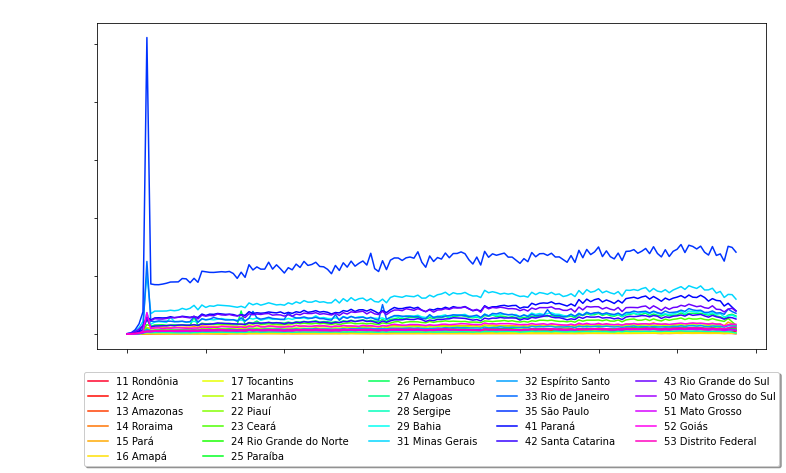

In [45]:
usaveis_grafico = usaveis.T.plot(figsize = (12,6),colormap="gist_rainbow")
usaveis_grafico.legend(loc='upper center',bbox_to_anchor=(0.5, -0.055),shadow=True,ncol=5) #como adicionar legenda fora

usaveis_grafico.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

plt.yticks(color='w',fontsize=8)
plt.xticks(color='w',fontsize=8)
plt.title("Valores mensais de cada Estado dos anos de 2007-2020",fontsize= 12,color='w')
plt.show()

##DESAFIO AULA 3 - 02 
>Criar uma coluna chamada regiões a por cada estado a sua região

>Primeiro, como se cria uma nova coluna?

In [ ]:
#Para criar uma nova coluna, precisa-se observar que para funcionar, ela deve possuir o mesmo número itens
#que existem nas linhas. Uma coluna de 27 itens no nosso caso
#Vamos criar na variavel usaveis, a coluna "total"
usaveis["total"] = usaveis.sum(axis=1)
usaveis.head(1)

In [47]:
#estou criando uma nova coluna chamada região. Esta coluna recebe o primeiro caracter de cada indice. Veremos isso logo abaixo
usaveis["regiao"] = usaveis.index.str[0]

#crio um dicionario que para cada valor, atribui-se as regiões. "11 rondonia" começa com "1", logo será norte
regioes_map = {1:"Norte",2:"Nordeste",3:"Sudeste",4:"Sul",5:"Centro-Oeste"}

#agora, adicionamos nos 27 espaços uma nova informação
#em usaveis região, onde temos apenas os caracteres iniciais de cada indice, passamos um map. Cada valor da key regiões_map será adicionada em
#usaveis["regiao"]. Alem disso, convertermos o "1" de string para inteiro, dessa forma, será procurado em nosso dicionario o valor correspondente
usaveis["regiao"] = usaveis["regiao"].map(lambda x: regioes_map[int(x)])
usaveis["regiao"]

Unidade da Federação
11 Rondônia                      Norte
12 Acre                          Norte
13 Amazonas                      Norte
14 Roraima                       Norte
15 Pará                          Norte
16 Amapá                         Norte
17 Tocantins                     Norte
21 Maranhão                   Nordeste
22 Piauí                      Nordeste
23 Ceará                      Nordeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
26 Pernambuco                 Nordeste
27 Alagoas                    Nordeste
28 Sergipe                    Nordeste
29 Bahia                      Nordeste
31 Minas Gerais                Sudeste
32 Espírito Santo              Sudeste
33 Rio de Janeiro              Sudeste
35 São Paulo                   Sudeste
41 Paraná                          Sul
42 Santa Catarina                  Sul
43 Rio Grande do Sul               Sul
50 Mato Grosso do Sul     Centro-Oeste
51 Mato Grosso            Centro-Oeste
52 G

In [48]:
#O que havia inicialmente em cada linha da coluna "regiões"
# os caracteres iniciais de cada index
usaveis.index.str[0]

Index(['1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '3', '3', '3', '3', '4', '4', '4', '5', '5', '5', '5'],
      dtype='object', name='Unidade da Federação')

##Tentativa de plotar gastos nas regiões
> Ficou um código gigante, mas ao menos tentei

In [137]:
norte = []
nordeste = []
sudeste =[]
sul = []
centro_oeste = []
for i in range(27):
  if usaveis["regiao"].str.startswith("Norte")[i]:
    norte.append(usaveis.index[i])
  elif usaveis["regiao"].str.startswith("Nordeste")[i]:
     nordeste.append(usaveis.index[i])
  elif usaveis["regiao"].str.startswith("Sudeste")[i]:
    sudeste.append(usaveis.index[i])
  elif usaveis["regiao"].str.startswith("Sul")[i]:
    sul.append(usaveis.index[i])
  else:
    usaveis["regiao"].str.startswith("Centro-Oeste")[i]
    centro_oeste.append(usaveis.index[i])


['50 Mato Grosso do Sul', '51 Mato Grosso', '52 Goiás', '53 Distrito Federal']

In [144]:
total_norte =usaveis["total"][:7]
total_nordeste = usaveis["total"][7:16]
total_sudeste = usaveis["total"][16:20]
total_sul = usaveis["total"][20:23]
total_centro = usaveis["total"][23:27]

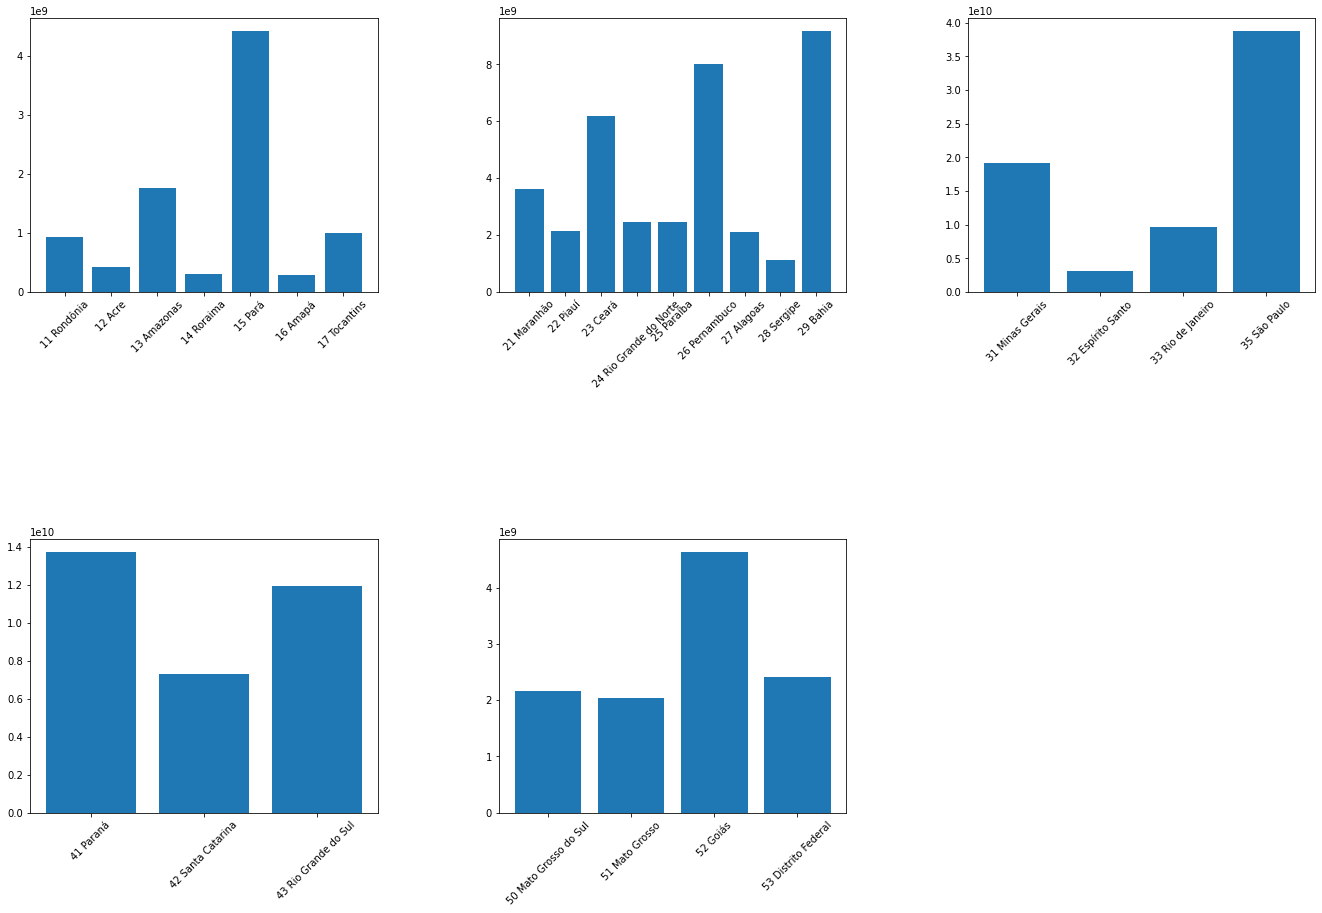

In [170]:
plt.figure(figsize=(21,12))
plt.subplot(231)
plt.bar(norte,total_norte)
plt.xticks(rotation=45)

plt.subplot(232)
plt.bar(nordeste,total_nordeste)
plt.xticks(rotation=45)


plt.subplot(233)
plt.bar(sudeste,total_sudeste)
plt.xticks(rotation=45)

plt.subplot(234)
plt.bar(sul,total_sul)
plt.xticks(rotation=45)

plt.subplot(235)
plt.bar(centro_oeste,total_centro)
plt.xticks(rotation=45)

plt.subplots_adjust(top=0.92, bottom=0, left=0.10, right=0.95, hspace=0.9,
                    wspace=0.35)
plt.show()

#AULA 04
---

## Ordenar a tabela pelo total de gastos dos estados
>Como organizar nossa tabela agora, mas não pelos indices, mas sim pela coluna total. Ou seja, mostrar os estados que mais gastaram (ou menos) de maneira ordenada

In [198]:
# usaveis.sort_values("total") -------------> Neste caso ele mostra do menor gasto (na primeira linha) até o que mais gastou
ordenado_por_total_gastos = usaveis.sort_values("total", ascending=False) # do maior gasto ao menor
ordenado_por_total_gastos = ordenado_por_total_gastos.drop("total",axis=1)
ordenado_por_total_gastos.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,Sul
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,529286

> Vou remover 'regiao' de ordenado_por_total_gastos só para nao gerar erro. Mas ele ainda existe  em 'usaveis'

In [203]:
# ordenado_por_total_gastos = ordenado_por_total_gastos.drop('regiao',axis=1)


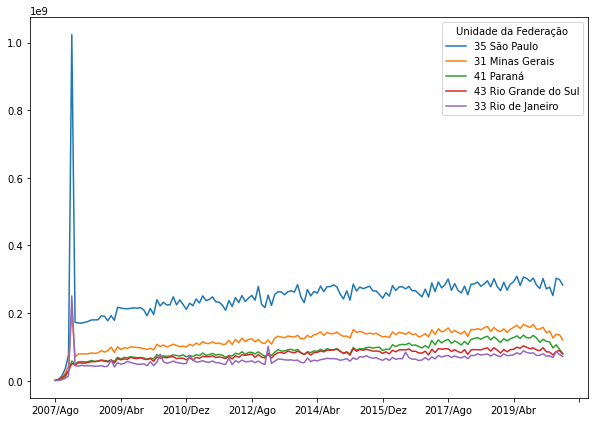

In [214]:
ordenado_por_total_gastos.head(5).T.plot(figsize=(10,7))

#PLOTAR GRÁFICO POR REGIÕES

> O que estou fazendo?
* Crio uma variavel que recebe uma cópia da tabela que contem os gastos ordenados
* crio uma coluna chamada região. Aqui, ela não terá nomes como "sul". A cada uma das 27 linhas a partir do indice (que são os nomes dos estados), pego o primeiro caracter. Ex: '11 rondônia' ('1' caracter de indice zero)
* confiro então que funcionou. Uma nova coluna foi criada e está preenchida com os primeiros caracteres do index "Unidades da Federação"

In [294]:
ordenado_regiao = ordenado_por_total_gastos.copy()
ordenado_regiao['regiao'] = (ordenado_por_total_gastos.index).str[0]
ordenado_regiao[["regiao"]].head(1)

,regiao
Unidade da Federação,
35 São Paulo,3


* Crio uma variavel chamada **regiao**
*  pego minha tabela, e com o groupby, a partir da coluna regiao, ele vai procurar todos os que começam com os mesmo valores (1,2,3,4,5) e será a aplicada a função *sum()* que fará uma somatória de tudo.
* crio a variavel chamada colunas corrigidas que pegará as colunas de "2008/Fev" em diante. Logo depois, testo.

In [312]:
regiao = ordenado_regiao.groupby(['regiao']).sum()
colunas_corrigidas = regiao.columns[6:]
regiao[colunas_corrigidas]

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
regiao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,38844188.02,42058042.63,43806481.51,45231240.95,44643930.10,43735684.31,44224992.50,44499904.46,44847041.79,44277312.77,44950230.48,48215212.04,45308586.15,54026837.93,51813801.79,51645252.76,50881864.42,51036564.73,52887096.10,51018856.28,52933630.77,51308379.31,49144353.01,51588403.75,48521391.60,56875455.88,54444882.95,56246429.60,52818872.35,52754387.98,55104821.48,54613086.14,53876926.72,52932831.88,51928975.79,55136001.00,51902595.32,58230589.86,55979350.00,56620466.46,...,65605194.83,70562029.99,68342011.18,68995718.93,70621753.19,68434808.74,69735041.10,67354871.16,66307093.09,69852825.90,62859787.25,70453476.50,70977643.84,74367196.35,70580522.95,72841735.60,75410695.12,71791262.67,77822894.11,70003796.02,68623448.48,72421205.47,67715770.80,72901945.25,71953402.86,72079637.35,68310792.30,78271579.42,77340361.36,76277098.92,78765536.95,75414428.92,74370763.81,77196660.63,73819692.73,71682268.87,65225598.45,83998905.79,75232976.77,58932690.50
2,143170221.70,163986250.16,169546980.47,169279054.51,161307575.30,182631707.98,166813086.44,168149195.92,170330608.76,165396711.32,163085801.66,202595491.38,163451462.14,204609388.78,195038574.57,199391698.85,191469883.45,198725363.21,202722430.11,198393665.99,200684037.33,192584246.77,184367168.39,239363499.24,177953656.96,217389417.25,204724200.36,222675880.46,194423247.10,201845931.69,212368422.20,204038687.98,204915989.17,200577037.43,195548998.56,210059507.90,202899441.81,220220628.75,212622075.24,222125480.77,...,274260574.14,304199292.96,284478452.35,292572852.35,304413487.25,282228280.62,295937549.16,280123199.32,269787499.34,293723811.29,259239528.41,296439744.20,303031041.02,312691505.68,292611640.07,305217110.82,315754956.58,290161937.70,315437604.30,291771630.25,278660709.51,303716429.55,284772373.71,299400607.05,308351934.78,332241953.25,300860901.65,324737398.29,321122642.13,317420669.40,325348004.05,304280785.96,291045984.59,313214292.70,286186822.01,284252110.84,247582825.54,291127863.98,282825489.06,245911328.83
3,297291483.85,304755569.67,307074038.20,307411386.26,311017861.48,318279330.75,315144195.00,318035764.58,337698269.16,329263923.96,321556374.04,365658781.11,314832090.23,384431908.45,369983783.85,376508069.09,379973806.84,382775505.14,381034753.57,375703197.71,376156989.33,367987893.58,342780681.12,379287992.42,344411960.82,418047451.68,415304990.19,409184183.08,390224938.39,397215690.04,430722663.81,398185437.79,408595697.68,394135680.05,376501237.75,426861568.16,401659673.20,425489047.36,408119319.16,443059562.09,...,489612182.08,546550582.74,513760182.18,530244894.21,557989092.08,503648099.88,535381614.54,503955733.41,489385621.26,523819315.37,472410478.88,536420173.54,537372770.70,551734546.11,529530100.49,545689398.18,560121945.94,520693046.44,563999463.40,524905655.78,506998913.59,548928130.00,508836847.36,539180069.53,553155456.76,583648705.37,539647510.58,589904636.28,576685427.20,559681405.11,581473616.69,535355546.39,525155197.15,567328286.06,511635572.91,523835031.82,469923510.51,554620653.64,540094213.86,502177460.45
4,119162324.20,136023967.49,135894194.03,135608462.24,138847721.51,146243505.53,141820614.49,146727875.55,152232461.75,147231586.

* Crio **ax** que recebe regiao(fevereiro de 2008 pra frente), transponho ela, para que as coluna das datas virem linhas e defino seu plot e tamanho
* Formato o eixo Y com set_major_formatter e o ticker
* defino um grid que ficará atrás dos nosso gráfico por conta do **which = 'major'**
* defino as cores e tamanho dos eixos
* Crio uma variavel chamada *handles* (note que a segunda variavel, apesar de ter que existir, nao será usada)
* Aplico o *get_legend_handles_labels*.Está no módulo eixos da biblioteca matplotlib é usada para devolver as alças e rótulos para a legenda.
* Configuro a legenda, passando handles, uma lista com o que desejo por de xlabel, lembrando que ela deve corresponder ao regiao[colunas_corrigidas]
* Um título e pronto

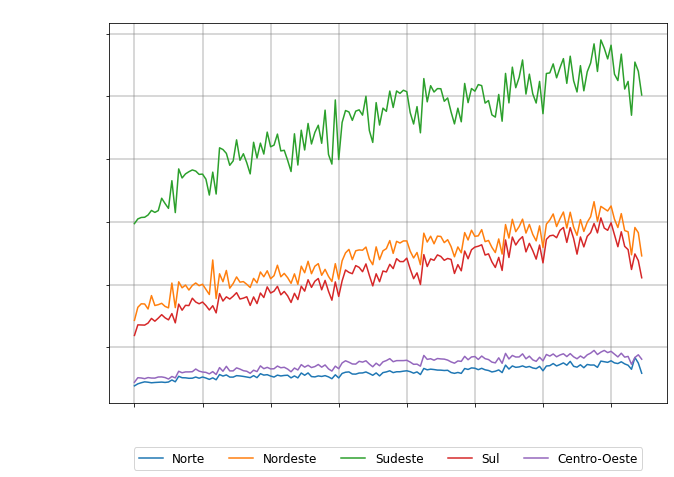

In [310]:
ax = regiao[colunas_corrigidas].T.plot(figsize=(10,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2F}"))

plt.grid(color='gray',linestyle='-',which='major',linewidth=2,alpha= 0.3)


plt.yticks(color='w',fontsize=10)
plt.xticks(color='w',fontsize=10)

handles,_ = ax.get_legend_handles_labels()
ax.legend(handles,['Norte','Nordeste','Sudeste','Sul','Centro-Oeste'],fontsize=12,
          loc ='upper center',bbox_to_anchor =(0.5,-0.1),ncol = 5)

plt.title( "Gastos por região na Saúde de Fev/2008 até Jul/2020",color='w',fontsize=12)
plt.show()

#DESAFIO AULA 4 - 01
>Arrumar o gráfico e os valores exorbitantes existentes

> Então, O que aconteceu? Nosso gráfico, quando chegou na parte de são paulo por exemplo, no "2008/Jan" deu um salto exorbitante nos valores de dinheiro. Dentre algumas hipóteses, a que melhor podemos usar é a que, como os dados de nosso dataset são a partir de 2008, muitos valores, anteriores, podem ter sido passados de maneira errada ou mesmo acumulada. A melhor forma de resolver isso foi:

> **Observação**: Nossa coluna com o valor exorbitante é a "2008/Jan"
*  Seleciona as colunas depois desta com "defeito" 
*  aplicar slicing, salvando as colunas de fevereiro de 2008 para frente em uma nova variável
*  Chamar o dataset "ordenado_por_total_gastos" e passar como local inicial de amostra a nossa variavel que pega de fevereiro pra frente (excluindo janeiro e todos os anos anteriores)



In [218]:
colunas_interessadas = ordenado_por_total_gastos.columns[6:]
ordenado_por_total_gastos[colunas_interessadas].head(3)

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69


> O plot agora, pegando de "2008/Fev" em diante, fica assim:

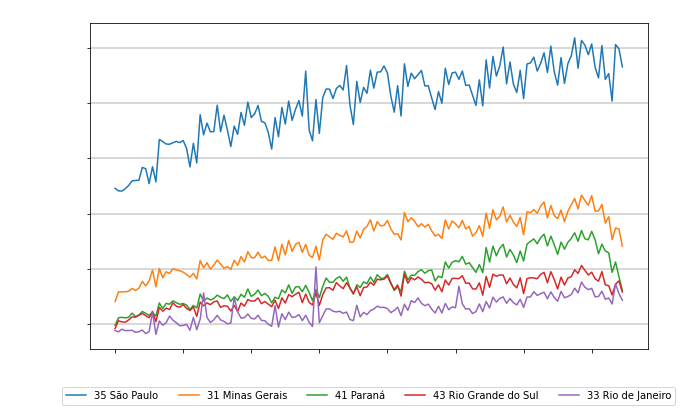

In [278]:
grafico_mais_gastos = ordenado_por_total_gastos[colunas_interessadas].head(5).T.plot(figsize=(10,6))
grafico_mais_gastos.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2F}"))
plt.yticks(color='w',fontsize=8)
plt.xticks(color='w',fontsize=8)
plt.legend(loc ='upper center',bbox_to_anchor =(0.5,-0.1),ncol = 5)
plt.grid(color='gray',linestyle='-',which='major',axis ='y',linewidth=2,alpha= 0.3) #which = 'major' poe o grid atras
plt.title("Estados com Maiores Gastos na Saúde de Fev/2008 até Jul/2020",color='w',fontsize=12)
plt.show()

#DESAFIO AULA 4 - 02
> Adicione o seu estado aos 5 estados plotados anteriormente

> O que fizemos?
* criei uma nova variável para armazenar a tabela dos 5 maiores anteriormente
* utilizei o .loc[] passando o nome do index que eu queria ("14 Roraima") e armazenei em uma variável chamada *estado_roraima*
* Depois, usei o .append() para adicionar a minha tabela e a sobrescrevi. Depois só a passei como referência para a amostragem dos gráficos

In [352]:
estados_maiores_gastos = ordenado_por_total_gastos[colunas_interessadas].head(5)
estado_roraima =ordenado_por_total_gastos[colunas_interessadas].loc["14 Roraima"]
estados_maiores_gastos = estados_maiores_gastos.append(estado_roraima)

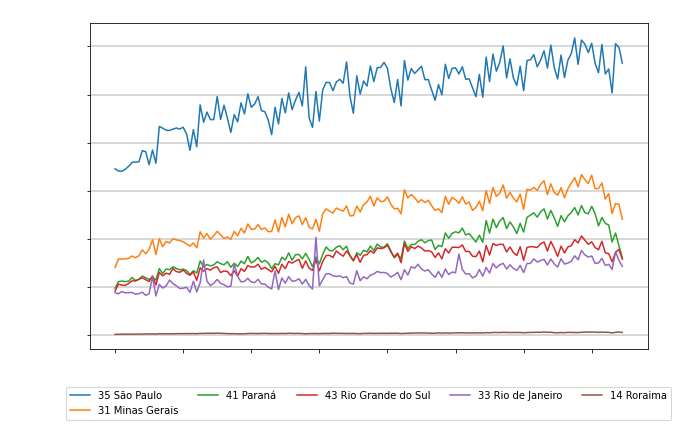

In [419]:

grafico_mais_gastos = estados_maiores_gastos.T.plot(figsize=(10,6))
grafico_mais_gastos.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2F}"))
plt.yticks(color='w',fontsize=8)
plt.xticks(color='w',fontsize=8)
plt.legend(loc ='upper center',bbox_to_anchor =(0.5,-0.1),ncol = 5)
plt.grid(color='gray',linestyle='-',which='major',axis ='y',linewidth=2,alpha= 0.3) #which = 'major' poe o grid atras
plt.title("Estados com Maiores Gastos na Saúde de Fev/2008 até Jul/2020",color='w',fontsize=12)
plt.show()

> Percebe-se que o Estado de Roraima, teve um dos menores gastos nos valores que tange ao SUS. Sua diferença para os demais é discrepante. Isso se torna mais visível ainda no segundo gráfico

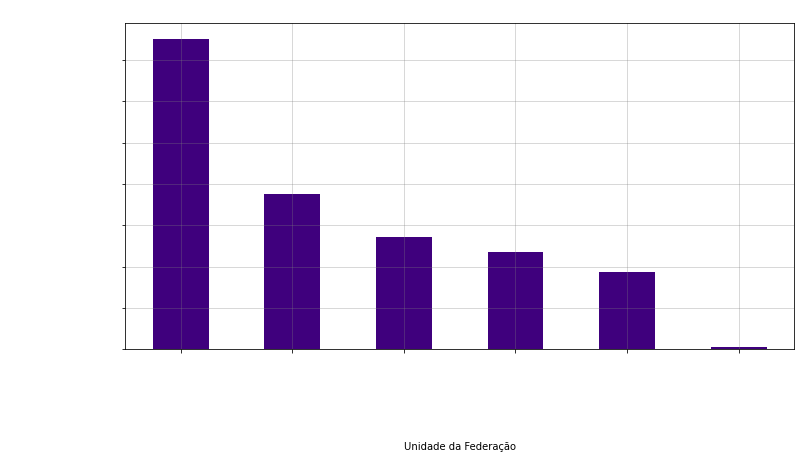

In [434]:
grafico_barra_estados = estados_maiores_gastos.T.sum().plot(figsize=(12,6),kind="bar",colormap='Purples_r')
grafico_barra_estados.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.grid(color='gray',linestyle='-',which='major',linewidth=1,alpha= 0.3) #which = 'major' poe o grid atras

plt.yticks(color='w',fontsize=10)
plt.xticks(rotation=45,color='w',fontsize=10)

plt.title("Estados com Maiores Gastos na Saúde de Fev/2008 até Jul/2020 em Comparação a Roraima",color='w',fontsize=12)
plt.show()
